# PCM properties

The PCM class does a lot of data preprocessing under the hood in order to classify profiles. 

Here is how to access PCM preprocessed results and data.


In [1]:
# Hidden cell
import os, sys
import numpy as np
import pandas as pd
import xarray as xr
print("xarray: %s, %s" % (xr.__version__, xr.__file__))

import sklearn
print("sklearn: %s, %s" % (sklearn.__version__, sklearn.__file__))

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0, os.path.abspath('/Users/gmaze/git/github/gmaze/pyxpcm'))
import pyxpcm
print("pyxpcm: %s, %s" % (pyxpcm.__version__, pyxpcm.__file__))

xarray: 0.14.2.dev62+g6d1434e9, /Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/xarray/__init__.py
sklearn: 0.22.1, /Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/sklearn/__init__.py


pyxpcm: 0.4.0, /Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/__init__.py


**Import and set-up**

Import the library and toy data

In [2]:
import pyxpcm
from pyxpcm.models import pcm

Let's work with a standard PCM of temperature and salinity, from the surface down to -1000m:

In [3]:
# Define a vertical axis to work with
z = np.arange(0.,-1000,-10.)

# Define features to use
features_pcm = {'temperature': z, 'salinity': z}

# Instantiate the PCM
m = pcm(K=4, features=features_pcm, maxvar=2)
print(m)

<pcm 'gmm' (K: 4, F: 2)>
Number of class: 4
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>


Note that here we used a strong dimensionality reduction to limit the dimensions and size of the plots to come (``maxvar==2`` tell the PCM to use the first 2 PCAs of each variables).

Now we can load a dataset to be used for fitting.

In [4]:
ds = pyxpcm.tutorial.open_dataset('argo').load()

Fit and predict model on data:

In [5]:
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
ds = ds.pyxpcm.fit_predict(m, features=features_in_ds, inplace=True)
print(ds)

<xarray.Dataset>
Dimensions:     (DEPTH: 282, N_PROF: 7560)
Coordinates:
  * N_PROF      (N_PROF) int64 0 1 2 3 4 5 6 ... 7554 7555 7556 7557 7558 7559
  * DEPTH       (DEPTH) float32 0.0 -5.0 -10.0 -15.0 ... -1395.0 -1400.0 -1405.0
Data variables:
    LATITUDE    (N_PROF) float32 ...
    LONGITUDE   (N_PROF) float32 ...
    TIME        (N_PROF) datetime64[ns] ...
    DBINDEX     (N_PROF) float64 ...
    TEMP        (N_PROF, DEPTH) float32 27.422163 27.422163 ... 4.391791
    PSAL        (N_PROF, DEPTH) float32 36.35267 36.35267 ... 34.910286
    SIG0        (N_PROF, DEPTH) float32 ...
    BRV2        (N_PROF, DEPTH) float32 ...
    PCM_LABELS  (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    Sample test prepared by:  G. Maze
    Institution:              Ifremer/LOPS
    Data source DOI:          10.17882/42182


## Scaler properties

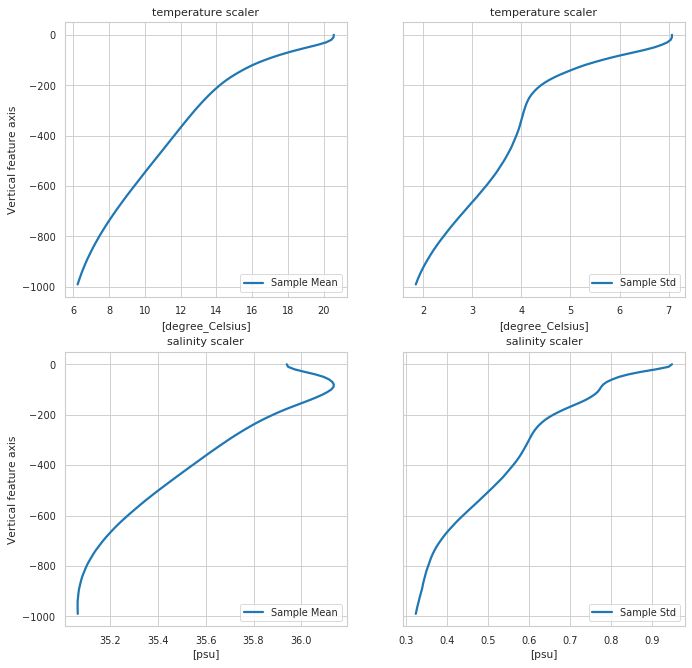

In [6]:
fig, ax = m.plot.scaler()

# More options:
# m.plot.scaler(style='darkgrid')
# m.plot.scaler(style='darkgrid', subplot_kw={'ylim':[-1000,0]})

## Reducer properties

Plot eigen vectors for a PCA reducer or nothing if no reduced used

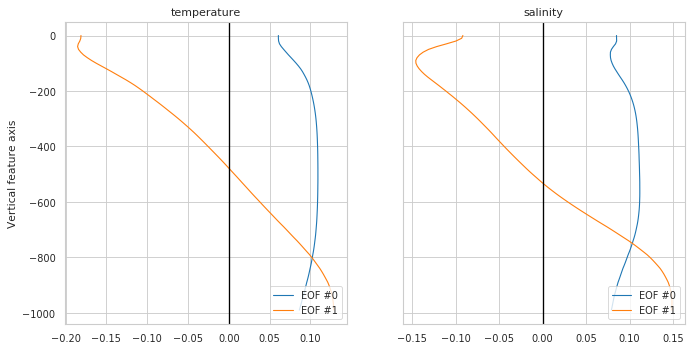

In [7]:
fig, ax = m.plot.reducer()
# Equivalent to:
# pcmplot.reducer(m)

# More options:
# m.plot.reducer(pcalist = range(0,4));
# m.plot.reducer(pcalist = [0], maxcols=1);
# m.plot.reducer(pcalist = range(0,4), style='darkgrid',  plot_kw={'linewidth':1.5}, subplot_kw={'ylim':[-1400,0]}, figsize=(12,10));

In [8]:
X, sampling_dims = m.preprocessing(ds, features=features_in_ds)
X

<xarray.DataArray (n_samples: 7560, n_features: 4)>
array([[ 1.9281656 , -0.09149919,  1.7340997 , -0.27024782],
       [ 2.314077  ,  0.10684185,  2.0836833 , -0.18765019],
       [ 1.6755121 , -0.17313023,  1.5637012 , -0.43244886],
       ...,
       [-0.802601  , -0.5783772 , -1.5761338 , -0.31184074],
       [-0.9552184 , -0.6094395 , -1.8049222 , -0.4273216 ],
       [-0.8925139 , -0.6237318 , -1.7922652 , -0.46551177]],
      dtype=float32)
Coordinates:
  * n_samples   (n_samples) int64 0 1 2 3 4 5 ... 7554 7555 7556 7557 7558 7559
  * n_features  (n_features) <U13 'temperature_0' ... 'salinity_1'

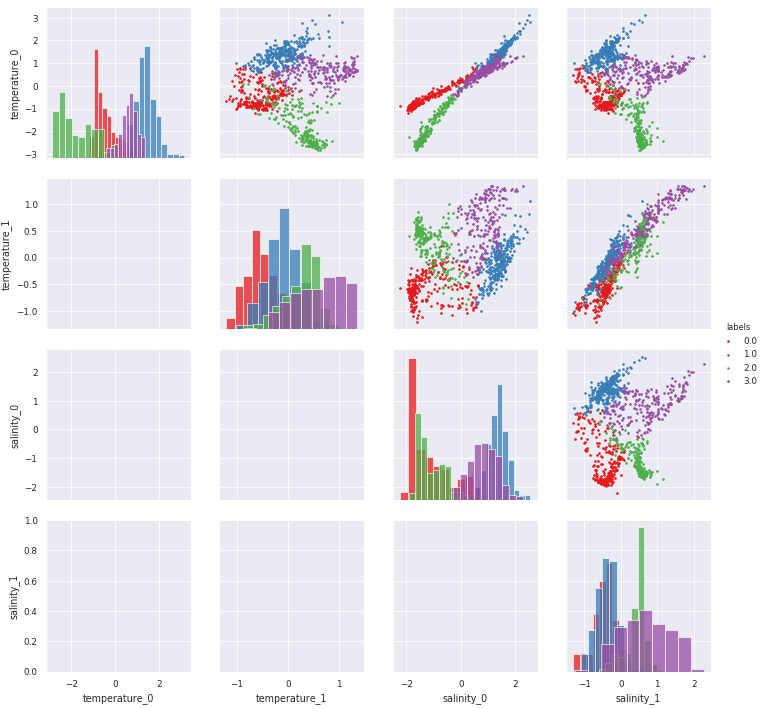

In [9]:
g = m.plot.preprocessed(ds, features=features_in_ds, style='darkgrid')

# A posteriori adjustements:
# g.set(xlim=(-3,3),ylim=(-3,3))
# g.savefig('toto.png')

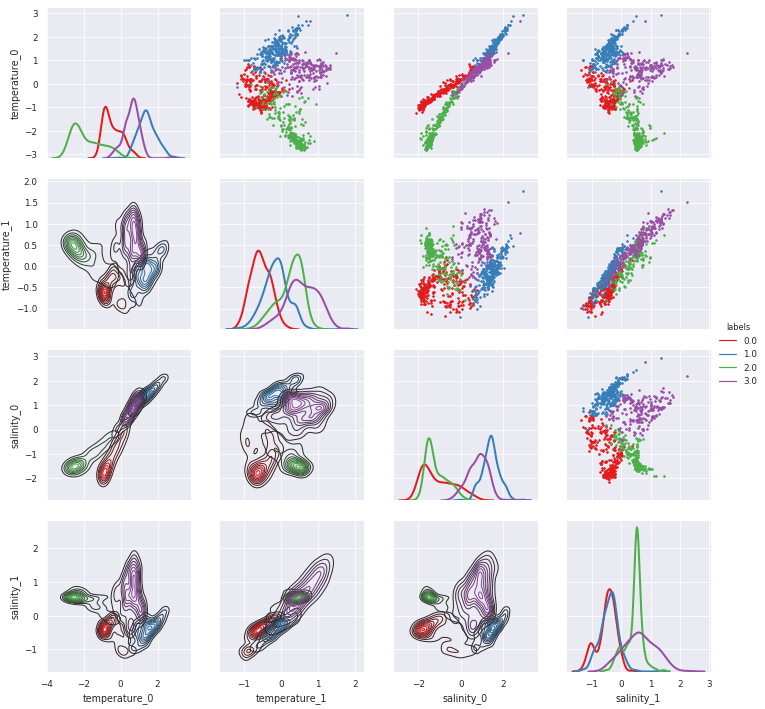

In [10]:
# Combine KDE with histrograms (very slow plot, so commented here):
g = m.plot.preprocessed(ds, features=features_in_ds, kde=True)